# Image Pre-Processing Demo

## Import Libraries
We are going to use two libaries to interact with images in this Lab. Unfortunately, they both have utilities called `Image`, which means that we will need to give one a nickname in order to prevent a conflict.

We will leverage the first library, `IPython.display` to visualize our image within the Jupyter notebook. You [can read more about the function we will be using here](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html#IPython.display.Image).

The second library, `PIL` (also known as Pillow), allows us to manipulate individual pixels in the image. You [can read more about this library here](https://pypi.org/project/pillow/).

If you want to use other libraries in this notebook, please include them below.

In [45]:
## ===============================================================
## Library Imports:
## ===============================================================
## +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
## Image display functionality
## +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
from IPython.display import Image as disp

## +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
## Pixel Manipulation
## +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
from PIL import Image

## +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
## Additional Libraries?
## +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#### Please insert other libraries as needed.
import os

## Pre-processing: Manipulating an Image in Python
Your learning objective in this lab is to better understand practical implementation of Markov Random Fields--so we'll give you the tools you need to load, save, and display images, as well as a method for accessing and updating individual pixels in an image. We will need to pre-process our image, to prepare it for an efficient implementation of our algorithm. We'll give you this, too, as there are some nuances in the libraries we are going to use that could make the problem much harder for you if you aren't careful! You are welcome to use all of this code in your submission. 

### Displaying an Image
If you want to display an image, we'll use the `Image()` function from `IPython.display` that we've nicknamed `disp()`. We want to make sure that the image file exists in the same level of heirarchy in our notebook (this is the case here).

We'll start by displaying our noisy image:

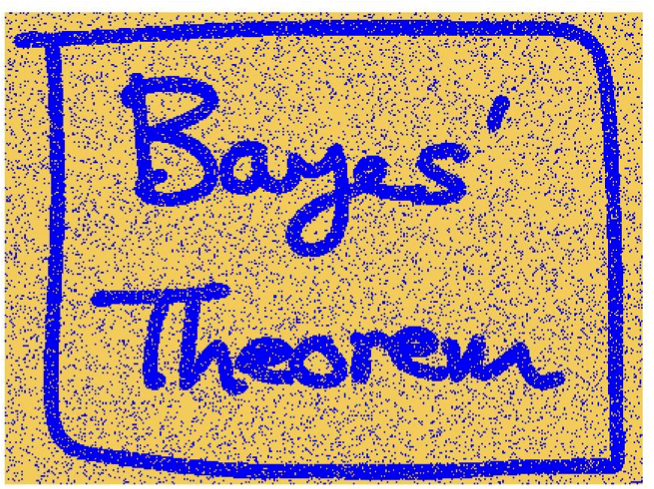

In [46]:
## +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
## Display an image file
## +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
disp(os.path.join(os.curdir,'figures','Bayes-noise.png'))

### Checking the Size of an Image
We'll use the `PIL` library to access the individual pixels in the image. The images we work with in this lab are all the same size. They are 654 pixels wide and 489 pixels tall. How do we know this? We can check the size with a few commands from the PIL library.

In [47]:
## +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
## Open and Load an Image File
## +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
## Start by opening the image file:
im_file = Image.open(os.path.join(os.curdir,'figures','Bayes-noise.png'))

## Load the image into a variable:
pixels = im_file.load()

## Print the dimensions of the image:
print(im_file.size)

(654, 489)


Let's save the size of the image in two variables, `width` and `length`.

In [48]:
## +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
## Save the Image Dimensions
## +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
width, length = im_file.size

### Understanding our Data
#### Coordinate System
Now that we know the size of our image, let's talk about how data is stored in the this format. Each pixel is given a coordinate point, referenced from the top left corner. Coordinate `(0,0)` is in the top left, and coordinate `(653,488)` (remember, we are indexing from zero) in the bottom right. 

#### Color Data
When we load in this image, the color data is stored in a tuple that contains 4 entries--RGB values that capture the color and an alpha parameter, A, that sets the transparency. This is called RGBA in the documentation.

RGB values range from 0 to 255.

RGB of `(0,0,0)` corresponds to black.

RGB of `(255,0,0)` corresponds to red.

RGB of `(0,255,0)` corresponds to green.

RGB of `(0,0,255)` corresponds to blue.

RGB of `(255,255,255)` corresponds to white.

A also spans from 0 to 255.

A of `0` corresponds to fully transparent.

A of `255` corresponds to fully opaque.

So a full line of a single pixel's color data in RGBA form might look like `(0,0,0,255)`--opaque black. This would be stored in some pixel coordinate at `[w,l]`.

#### Looking at the Raw Data
It is valuable to look at the raw data before beginning our implementation of the algorithm, as we might want to do some pre-processing of the image. Let's take a look at the raw data. Is it always uniform? Do we really have just two colors in this image?

In [49]:
## +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
## Open and Load the Image
## +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
## Start by opening the image file:
im_file = Image.open(os.path.join(os.curdir,'figures','Bayes-noise.png'))

## Load the image into a variable:
pixels = im_file.load()

## +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
## Print a subset of pixels
## +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
for l in range(5):
    for w in range(5):
        print(pixels[w,l])

(0, 0, 0, 0)
(0, 0, 0, 0)
(0, 0, 0, 0)
(0, 0, 0, 0)
(0, 0, 0, 0)
(255, 204, 255, 5)
(255, 251, 255, 255)
(255, 252, 255, 255)
(255, 254, 255, 255)
(255, 255, 254, 255)
(255, 204, 204, 5)
(255, 252, 254, 255)
(255, 254, 254, 255)
(255, 255, 254, 255)
(255, 255, 251, 255)
(255, 255, 204, 5)
(255, 255, 243, 255)
(255, 255, 243, 255)
(255, 255, 247, 255)
(255, 255, 249, 255)
(255, 255, 204, 5)
(255, 255, 235, 255)
(255, 255, 240, 255)
(255, 255, 243, 255)
(255, 255, 249, 255)


### Image Pre-Processing
The colors aren't a binary! To make it easier to work with our image, let's convert the color image to black and white. To do this, we'll look at each pixel and average the R G and B values together. If the average is greater than 127, then we can say that this would be a white pixel, if the average is less than 127 then it should be a black pixel.

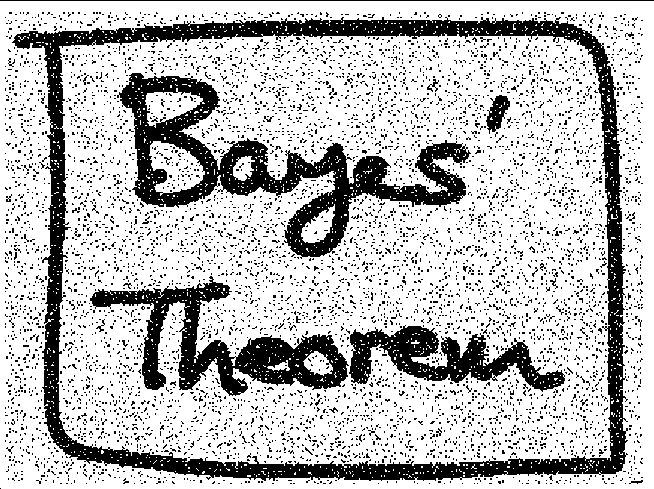

In [50]:
## +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
## Open and Load the Image
## +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
## Start by opening the image file:
RGBA_im_file = Image.open(os.path.join(os.curdir,'figures','Bayes-noise.png'))

## Load the image into a variable:
pixels = RGBA_im_file.load()

## +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
## Convert the image to black and white by hand
## +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
## RED:   pixels[w,l][0]
## GREEN: pixels[w,l][1]
## BLUE:  pixels[w,l][2]

width, length = RGBA_im_file.size
for l in range(length):
    for w in range(width):
        avg_color = (pixels[w,l][0]+pixels[w,l][1]+pixels[w,l][2])/3
        ## Set white
        if avg_color > 127:
            pixels[w,l] = (255,255,255,255)
        ## Set black
        else:
            pixels[w,l] = (0,0,0,255)
            
RGBA_im_file.save(os.path.join(os.curdir,'figures','Bayes-bw-by-hand.png'))
disp(os.path.join(os.curdir,'figures','Bayes-bw-by-hand.png'))

Let's check our work:

In [51]:
## +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
## Open and Load the Image
## +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
## Start by opening the image file:
im_file = Image.open(os.path.join(os.curdir,'figures','Bayes-bw-by-hand.png'))

## Load the image into a variable:
pixels = im_file.load()

## +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
## Print a subset of pixels
## +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
for l in range(5):
    for w in range(5):
        print(pixels[w,l])

(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(255, 255, 255, 255)
(255, 255, 255, 255)
(255, 255, 255, 255)
(255, 255, 255, 255)
(255, 255, 255, 255)
(255, 255, 255, 255)
(255, 255, 255, 255)
(255, 255, 255, 255)
(255, 255, 255, 255)
(255, 255, 255, 255)
(255, 255, 255, 255)
(255, 255, 255, 255)
(255, 255, 255, 255)
(255, 255, 255, 255)
(255, 255, 255, 255)
(255, 255, 255, 255)
(255, 255, 255, 255)
(255, 255, 255, 255)
(255, 255, 255, 255)
(255, 255, 255, 255)


### Considering the Data Structure
So this works for creating a black and white image, but it's still in an RGBA format, which is a little clunky to use. It would be easier to implement your algorithm if you could use a binary file. So while you've seen one way to do this pre-processing by hand, let's use a higher level library to convert the color information to a binary represented by a single value for each pixel, rather than four.

We'll use the PIL `convert()` function. You [can read more about the different modes here](https://pillow.readthedocs.io/en/stable/handbook/concepts.html).

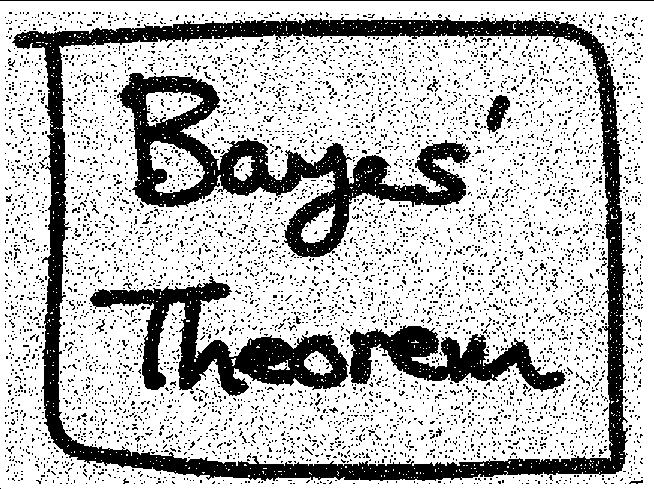

In [52]:
## +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
## Open the file
## +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
RGBA_im_file = Image.open(os.path.join(os.curdir,'figures','Bayes-noise.png'))

## +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
## Convert to black and white
## +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
BW_im_file = RGBA_im_file.convert(mode="1",dither=0)

## +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
## Save and display the file
## +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
BW_im_file.save(os.path.join(os.curdir,'figures','Bayes-pre-processed.png'))
disp(os.path.join(os.curdir,'figures','Bayes-pre-processed.png'))

### Examing the Raw Data (Again)

In [53]:
## +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
## Open and Load the Image
## +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
## Start by opening the image file:
BW_im_file = Image.open(os.path.join(os.curdir,'figures','Bayes-pre-processed.png'))

## Load the image into a variable:
pixels = BW_im_file.load()

## +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
## Print a subset of pixels
## +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
for l in range(5):
    for w in range(5):
        print(pixels[w,l])

0
0
0
0
0
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255


We now see that a single value sets the color of the pixel. `0` corresponds to black, `255` corresponds to white.

### A Cautionary Tale:
Be careful when doing your pre-processing that you don't mess up the starting data! Initially, when preparing this notebook for you and doing the conversion from RGBA to binary, we left out the `dither=0` argument to the `.covert()` function. This was the result:

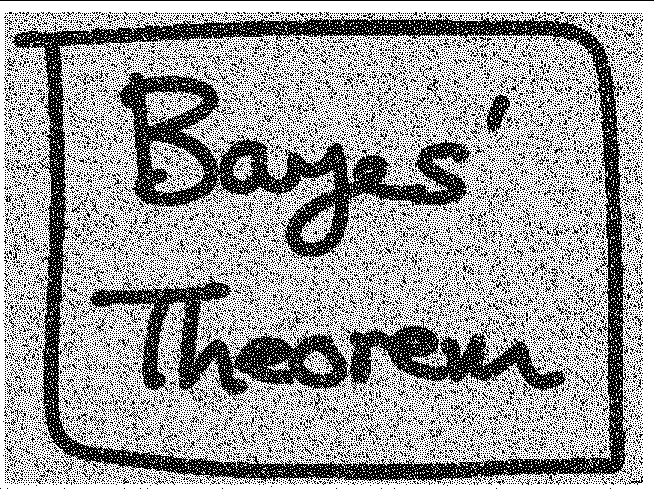

In [54]:
## +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
## Open the file
## +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
RGBA_im_file = Image.open(os.path.join(os.curdir,'figures','Bayes-noise.png'))

## +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
## Convert to black and white
## +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
## NOTE: THIS IS AN INCORRECT WAY TO DO THIS!
## INCORRECT!
BW_im_file = RGBA_im_file.convert(mode="1")

## +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
## Save and display the file
## +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
BW_im_file.save(os.path.join(os.curdir,'bad_figures','Bayes-incorrectly-pre-processed.png'))
disp(os.path.join(os.curdir,'bad_figures','Bayes-incorrectly-pre-processed.png'))

Look at how many pixel values are flipped now! This is a much more challenging problem than the one that we were originally trying to solve!

So be careful when pre-processing. Look at the raw data. If you can visualize the raw data, do so. Sanity check yourself at every step. It's easy to make mistakes, even when what you are doing is relatively straightforward. Even once you are an expert in your field, even when you have done this for many years--you are still prone and vulnerable to making mistakes. We want to cultivate methodical design practices that anticipate that we *will* make mistakes and give us the tools to identify them when they occur. Most of the time, the hard part is figuring out where a mistake occurred, not fixing it.

But we digress. What were we trying to do again? Open up `ml-lab-501-tasks.ipynb` to clean up this image!